In [33]:
import pandas as pd
import numpy as np
import sklearn
import seaborn as sns
import matplotlib.pyplot as plt

In [34]:
df = pd.read_csv("winequality-red.csv")

In [35]:
df

,Unnamed: 0,fixed acidity,volatile acidity,citric acid,residual sugar,chlorides,free sulfur dioxide,total sulfur dioxide,density,pH,sulphates,alcohol,quality
0,0,7.4,0.700,0.00,1.9,0.076,11.0,34.0,0.99780,3.51,0.56,9.4,1
1,1,7.8,0.880,0.00,2.6,0.098,25.0,67.0,0.99680,3.20,0.68,9.8,1
2,2,7.8,0.760,0.04,2.3,0.092,15.0,54.0,0.99700,3.26,0.65,9.8,1
3,3,11.2,0.280,0.56,1.9,0.075,17.0,60.0,0.99800,3.16,0.58,9.8,0
4,4,7.4,0.700,0.00,1.9,0.076,11.0,34.0,0.99780,3.51,0.56,9.4,1
...,...,...,...,...,...,...,...,...,...,...,...,...,...
1314,1594,6.2,0.600,0.08,2.0,0.090,32.0,44.0,0.99490,3.45,0.58,10.5,1
1315,1595,5.9,0.550,0.10,2.2,0.062,39.0,51.0,0.99512,3.52,0.76,11.2,0
1316,1596,6.3,0.510,0.13,2.3,0.076,29.0,40.0,0.99574,3.42,0.75,11.0,0
1317,1597,5.9,0.645,0.12,2.0,0.075,32.0,44.0,0.99547,3.57,0.71,10.2,1


En esta celda, mostramos las primeras filas del DataFrame para verificar que los datos se han cargado correctamente. Podemos observar que el DataFrame contiene 13 columnas, incluidas características como la acidez fija, acidez volátil, ácido cítrico, azúcares residuales, cloruros, dióxido de azufre libre y total, densidad, pH, sulfatos, alcohol y calidad. 

In [36]:
# Verificamos si la columna 'Unnamed: 0' es un índice redundante comparándola con el índice del DataFrame
if df['Unnamed: 0'].equals(df.index):
    # Si es redundante, eliminamos la columna 'Unnamed: 0'
    df = df.drop(columns=['Unnamed: 0'])
else:
    # Si no es redundante, renombramos la columna para un mejor entendimiento
    df = df.rename(columns={'Unnamed: 0': 'Index'})

# Mostramos las primeras filas del DataFrame para confirmar la eliminación o renombrado de la columna
df.head()

,Index,fixed acidity,volatile acidity,citric acid,residual sugar,chlorides,free sulfur dioxide,total sulfur dioxide,density,pH,sulphates,alcohol,quality
0,0,7.4,0.70,0.00,1.9,0.076,11.0,34.0,0.9978,3.51,0.56,9.4,1
1,1,7.8,0.88,0.00,2.6,0.098,25.0,67.0,0.9968,3.20,0.68,9.8,1
2,2,7.8,0.76,0.04,2.3,0.092,15.0,54.0,0.9970,3.26,0.65,9.8,1
3,3,11.2,0.28,0.56,1.9,0.075,17.0,60.0,0.9980,3.16,0.58,9.8,0
4,4,7.4,0.70,0.00,1.9,0.076,11.0,34.0,0.9978,3.51,0.56,9.4,1


In [37]:
# Crear nuevas características a partir de las existentes
df['total_acidity'] = df['fixed acidity'] + df['volatile acidity']
df['sulfur_dioxide_ratio'] = df['free sulfur dioxide'] / df['total sulfur dioxide']
df['density_alcohol_interaction'] = df['density'] * df['alcohol']

In [38]:
df.describe() # Mostramos estadísticas descriptivas de las columnas del DataFrame para entender mejor la distribución de los datos

,Index,fixed acidity,volatile acidity,citric acid,residual sugar,chlorides,free sulfur dioxide,total sulfur dioxide,density,pH,sulphates,alcohol,quality,total_acidity,sulfur_dioxide_ratio,density_alcohol_interaction
count,1319.000000,1319.000000,1319.000000,1319.000000,1319.000000,1319.000000,1319.000000,1319.000000,1319.000000,1319.000000,1319.000000,1319.000000,1319.000000,1319.000000,1319.000000,1319.000000
mean,791.984079,8.254284,0.538560,0.258264,2.503867,0.088973,16.368461,48.946929,0.996867,3.311296,0.647263,10.252717,0.516300,8.792843,0.373245,10.219780
std,470.718363,1.682935,0.167679,0.187995,1.399633,0.047538,10.492335,32.714030,0.001815,0.152345,0.167334,0.972354,0.499924,1.653235,0.155157,0.959831
min,0.000000,4.700000,0.160000,0.000000,0.900000,0.034000,1.000000,6.000000,0.990070,2.860000,0.370000,8.400000,0.000000,5.300000,0.022727,8.406720
25%,381.500000,7.100000,0.410000,0.090000,1.900000,0.071000,8.000000,24.000000,0.995800,3.210000,0.540000,9.500000,0.000000,7.665000,0.250000,9.469600
50%,767.000000,7.800000,0.540000,0.240000,2.200000,0.080000,14.000000,40.000000,0.996800,3.310000,0.610000,10.000000,1.000000,8.390000,0.363636,9.968500
75%,1218.500000,9.100000,0.640000,0.400000,2.600000,0.091000,22.000000,65.000000,0.997900,3.400000,0.700000,10.900000,1.000000,9.635000,0.466092,10.846808
max,1598.000000,15.900000,1.330000,0.790000,15.500000,0.611000,72.000000,165.000000,1.003690,4.010000,1.980000,14.900000,1.000000,16.260000,0.857143,14.864240


En esta celda, utilizamos el método describe de Pandas para obtener estadísticas descriptivas de las columnas del DataFrame. Estas estadísticas incluyen la media, desviación estándar, valores mínimos y máximos, así como los percentiles 25%, 50% (mediana) y 75%.

Este análisis inicial nos proporciona una visión general de la distribución de los datos, permitiéndonos identificar posibles anomalías y rangos de valores para cada característica. Observamos que hay variación significativa en características como la acidez fija, el dióxido de azufre libre y total, y el contenido de alcohol.

In [39]:
df.dtypes

Index                            int64
fixed acidity                  float64
volatile acidity               float64
citric acid                    float64
residual sugar                 float64
chlorides                      float64
free sulfur dioxide            float64
total sulfur dioxide           float64
density                        float64
pH                             float64
sulphates                      float64
alcohol                        float64
quality                          int64
total_acidity                  float64
sulfur_dioxide_ratio           float64
density_alcohol_interaction    float64
dtype: object

En esta celda, mostramos los tipos de datos de cada columna en el DataFrame utilizando el atributo dtypes de Pandas.

Podemos ver que la mayoría de las columnas son de tipo float64, lo cual es apropiado para las características numéricas, mientras que la columna quality es de tipo int64, indicando que los valores de calidad son enteros.

In [40]:
df.isna().sum()

Index                          0
fixed acidity                  0
volatile acidity               0
citric acid                    0
residual sugar                 0
chlorides                      0
free sulfur dioxide            0
total sulfur dioxide           0
density                        0
pH                             0
sulphates                      0
alcohol                        0
quality                        0
total_acidity                  0
sulfur_dioxide_ratio           0
density_alcohol_interaction    0
dtype: int64

En esta celda, verificamos la cantidad de valores nulos en cada columna del DataFrame utilizando el método isna junto con sum.

Podemos concluir que no hay valores nulos en ninguna de las columnas del DataFrame, lo cual es un buen indicador de la calidad del conjunto de datos y nos permite proceder con el análisis sin necesidad de manejar valores faltantes.

<Figure size 2000x1500 with 0 Axes>

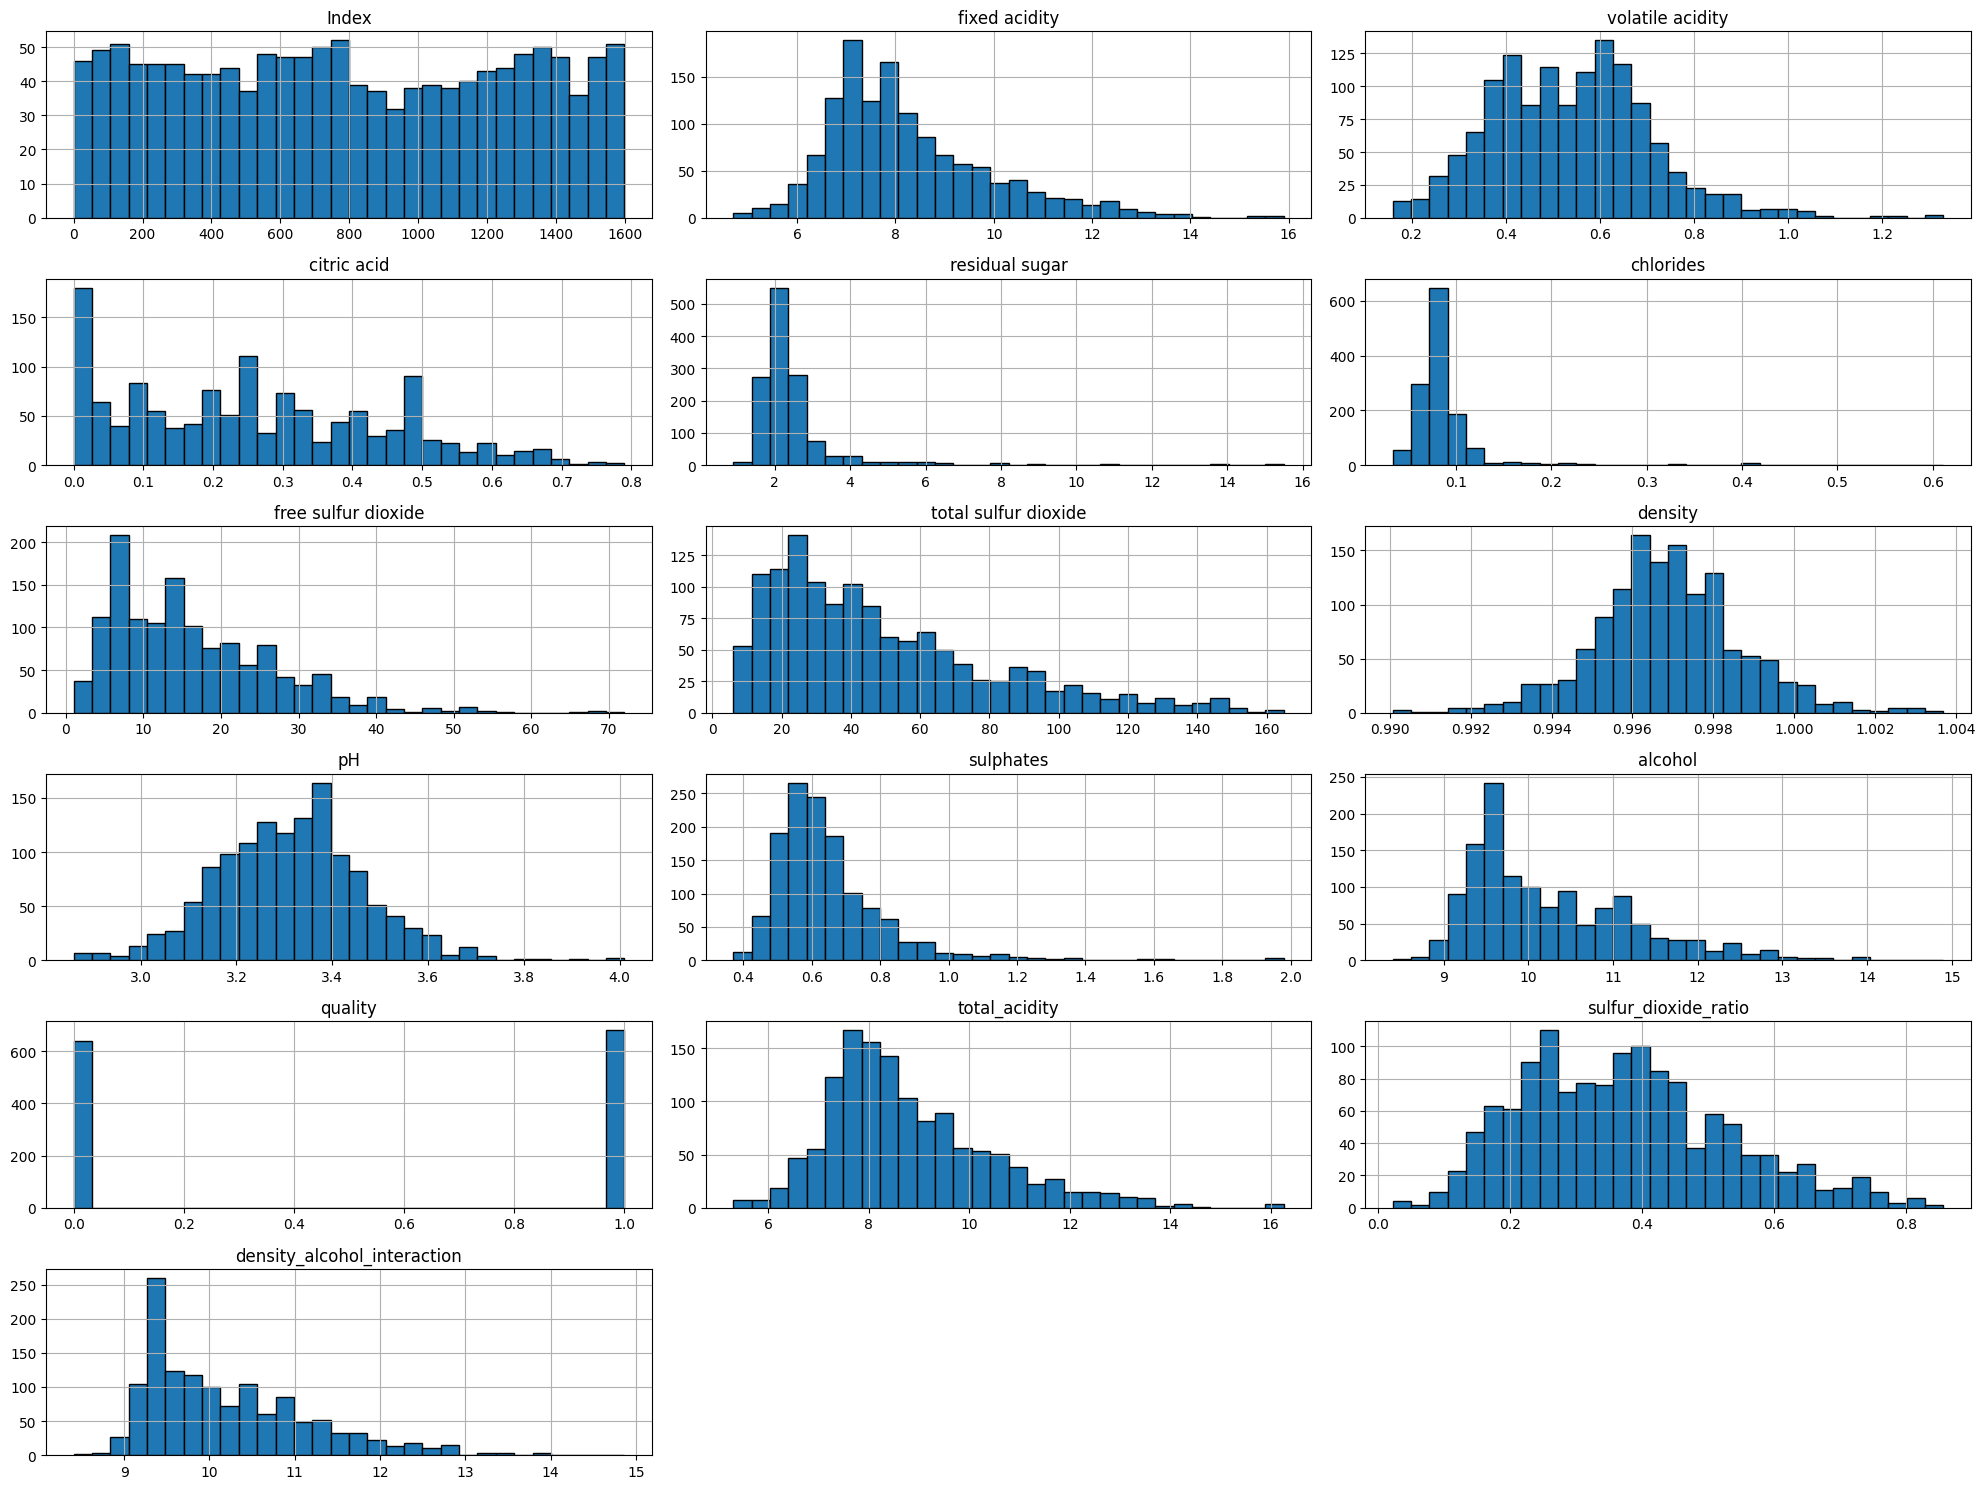

In [41]:
# Configurar el tamaño de la figura
plt.figure(figsize=(20, 15))

# Crear histogramas para cada columna del DataFrame
df.hist(bins=30, figsize=(20, 15), layout=(6, 3), edgecolor='black')

# Ajustar el layout para que no se solapen los títulos y las etiquetas
plt.tight_layout()

# Mostrar la figura
plt.show()



En esta celda, generamos histogramas para cada columna del DataFrame utilizando el método hist de Pandas. Los histogramas son una herramienta útil para visualizar la distribución de los datos en cada columna y nos permiten identificar patrones y posibles anomalías.

Al observar los histogramas, podemos notar lo siguiente:

Algunas columnas, como fixed acidity, volatile acidity y alcohol, tienen distribuciones sesgadas.

Otras columnas, como density, tienen una distribución más uniforme.

La columna quality muestra una distribución binaria, lo cual es esperado ya que representa una variable de calidad categórica.

<Axes: >

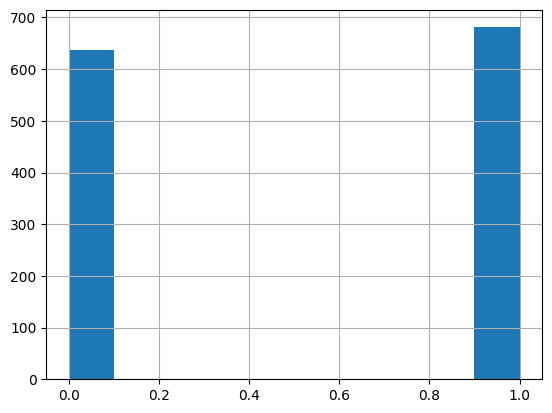

In [42]:
df["quality"].hist()

En esta celda, generamos un histograma para la columna quality del DataFrame. Este histograma nos permite visualizar la distribución de los valores de calidad en el conjunto de datos.

Observamos que la columna quality tiene una distribución bimodal, con dos valores distintos (0 y 1). Podemos interpretar estos valores como sigue:

- 0: Mala calidad
- 1: Buena calidad

En este analisis hemos podido ver que los datos están bien estructurados y libres de valores faltantes. Las visualizaciones iniciales sugieren que hay variabilidad significativa en las características químicas del vino que podrían influir en su calidad.

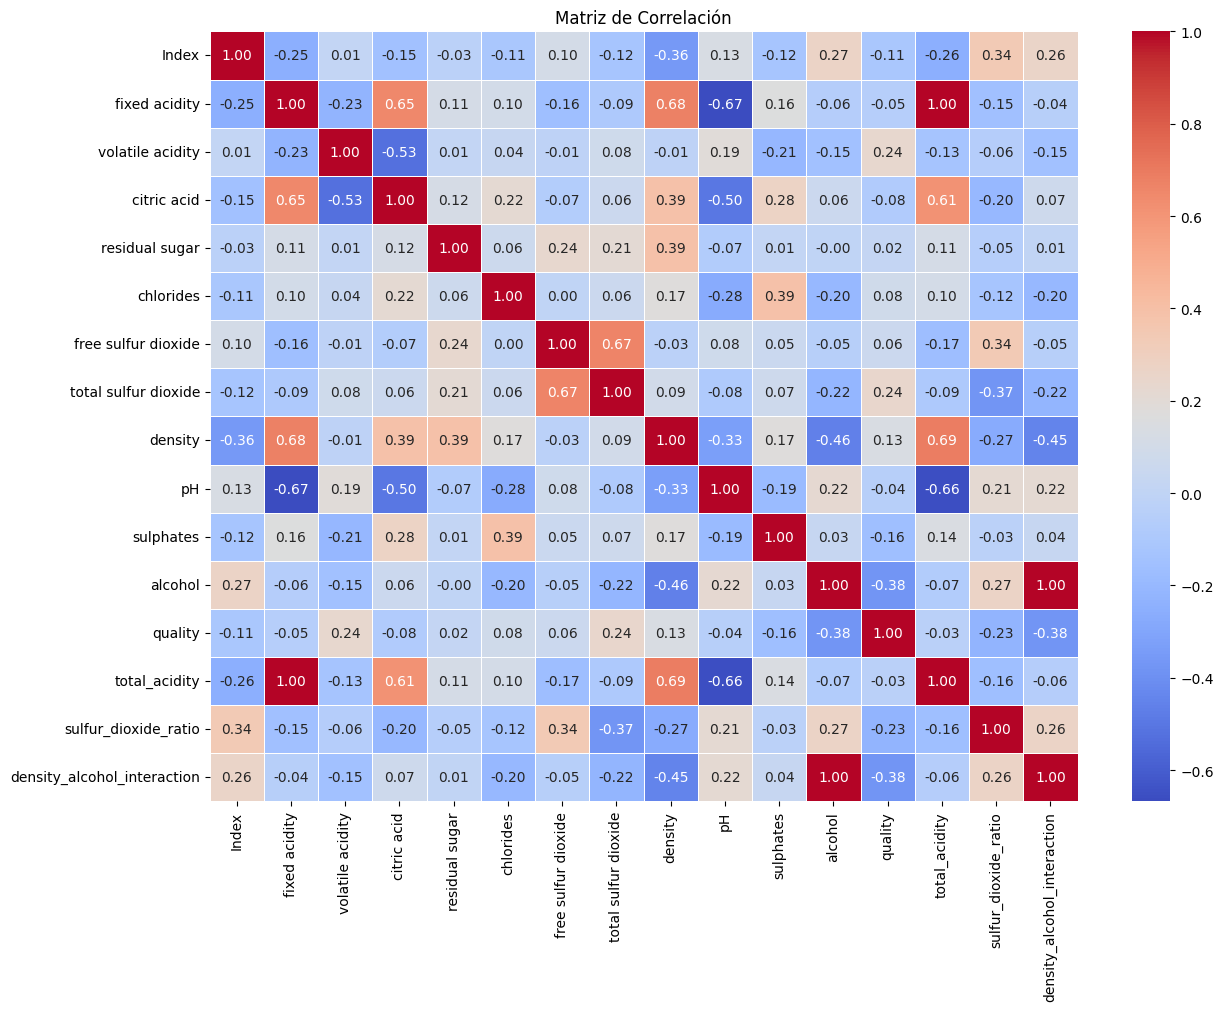

In [43]:
# Calcular la matriz de correlación
correlation_matrix = df.corr()

# Visualizar la matriz de correlación
plt.figure(figsize=(14, 10))
sns.heatmap(correlation_matrix, annot=True, fmt='.2f', cmap='coolwarm', linewidths=0.5)
plt.title('Matriz de Correlación')
plt.show()

In [44]:
X = df.drop("quality", axis=1) 
y = df["quality"]

En esta celda, separamos las características y la variable objetivo del conjunto de datos:

- X contiene todas las columnas del DataFrame excepto quality. Estas columnas representan las características químicas del vino, como la acidez fija, acidez volátil, ácido cítrico, azúcares residuales, cloruros, dióxido de azufre libre y total, densidad, pH, sulfatos y alcohol.

- y contiene la columna quality, que es nuestra variable objetivo. Esta columna clasifica la calidad del vino en dos categorías: 0 (mala calidad) y 1 (buena calidad).

Con esto hemos preparado los datos para el modelado predictivo, utilizando las características (X) para predecir la calidad del vino (y).

Con esta separación, estamos listos para proceder con la construcción y evaluación de modelos de clasificación que nos permitirán predecir la calidad del vino en función de sus características químicas.

In [45]:
from sklearn.model_selection import train_test_split

In [46]:
X_train, X_test, y_train, y_test = train_test_split(X,y, test_size=0.3, random_state=42)

Conjunto de Entrenamiento: Se utiliza para entrenar el modelo.

Conjunto de Prueba: Se utiliza para evaluar el rendimiento del modelo en datos no vistos durante el entrenamiento, proporcionando una estimación de su desempeño en datos reales.

Utilizamos **train_test_split** para dividir el conjunto de datos en dos partes: **80% para entrenamiento y 20% para prueba.** Esto nos permite entrenar el modelo con una parte de los datos y evaluar su rendimiento con una parte separada que el modelo no ha visto antes.

random_state=42 asegura que la división sea reproducible.

In [47]:
from sklearn.preprocessing import StandardScaler
from sklearn.pipeline import Pipeline 
from sklearn.linear_model import LogisticRegression

En esta celda, importamos varias herramientas importantes de la biblioteca Scikit-learn que utilizaremos para el procesamiento y modelado de los datos:

**StandardScaler:** Utilizado para normalizar las características. La normalización es un paso crucial cuando las características tienen diferentes escalas y distribuciones, ya que mejora la performance de muchos algoritmos de aprendizaje automático.

**Pipeline:** Nos permite crear una secuencia de pasos de procesamiento y modelado. Al usar un Pipeline, podemos encadenar transformaciones de datos y modelos preditivos en una sola línea de código, lo que facilita la organización y la reproducibilidad del flujo de trabajo.
    
**LogisticRegression:** Importamos el modelo de regresión logística, que es un algoritmo de clasificación lineal adecuado para predecir la calidad del vino (buena omala) basándose en sus características químicas.

In [48]:
scaler = StandardScaler()
lr = LogisticRegression()

# Creamos un pipeline que incluye la normalización y el modelo de regresión logística
pipeline_lr = Pipeline([
    ("scaler", scaler),  # Paso 1: Normalización de las características
    ("lr", lr)           # Paso 2: Modelo de regresión logística
])

**Normalización de Características:**
Utilizamos StandardScaler para normalizar las características. Esto asegura que todas las características tengan una media de 0 y una desviación estándar de 1, lo cual es importante para el rendimiento de muchos algoritmos de aprendizaje automático.

**Modelo de Regresión Logística:**
Creamos una instancia de LogisticRegression para nuestro modelo. La regresión logística es un algoritmo de clasificación lineal adecuado para predecir categorías binarias, como en nuestro caso (mala calidad o buena calidad del vino)

**Pipeline:**
Creamos un Pipeline que encadena la normalización de características y el modelo de regresión logística. Esto simplifica el proceso de entrenamiento y evaluación del modelo, asegurando que las transformaciones necesarias se apliquen de manera consistente.

In [49]:
pipeline_lr.fit(X_train, y_train) # Entrenamos el pipeline con los datos de entrenamiento

Pipeline(steps=[('scaler', StandardScaler()), ('lr', LogisticRegression())])

In [50]:
print(f"Score de entrenamiento: {pipeline_lr.score(X_train, y_train)}")
print(f"Score de test: {pipeline_lr.score(X_test, y_test)}")

Score de entrenamiento: 0.7313109425785482
Score de test: 0.6944444444444444


La diferencia entre el score de entrenamiento y el score de test sugiere que el modelo puede estar ligeramente sobreajustado a los datos de entrenamiento. Un score de test del 69.2% indica un rendimiento razonable, pero hay margen para mejorar.

In [51]:
from sklearn.svm import SVC

El modelo SVC o Maquinas de Soporte Vectorial es conocido por su capacidad de manejar problemas de clasificación complejos mediante el uso de diferentes funciones kernel, que permiten transformar los datos y encontrar un hiperplano óptimo en un espacio dimensional elevado.

In [52]:
scaler = StandardScaler()
svc = SVC()
pipeline_svc = Pipeline([
    ("scaler", scaler), ("svc", svc)
]) 

In [53]:
pipeline_svc.fit(X_train, y_train)

Pipeline(steps=[('scaler', StandardScaler()), ('svc', SVC())])

In [54]:
print(f"Score de entrenamiento: {pipeline_svc.score(X_train, y_train)}")
print(f"Score de test: {pipeline_svc.score(X_test, y_test)}")

Score de entrenamiento: 0.7833152762730228
Score de test: 0.7095959595959596


El modelo SVC ha mejorado ligeramente en comparación con el modelo de regresión logística, especialmente en el conjunto de prueba, donde la precisión ha aumentado del 69.2% al 71.7%. Este resultado muestra que el modelo SVC tiene un mejor rendimiento en la generalización a nuevos datos.

In [55]:
# Importar la clase GridSearchCV de la biblioteca scikit-learn para realizar la búsqueda de hiperparámetros
from sklearn.model_selection import GridSearchCV

# Definir la cuadrícula de hiperparámetros que se desean probar
# "svc__C" es el parámetro de regularización C del clasificador SVM
# "svc__kernel" es el tipo de kernel a utilizar en el SVM (aquí probaremos con "poly" y "rbf")
# "svc__gamma" es el parámetro gamma para el kernel SVM
param_grid = {
    "svc__C": [10, 100, 1000],
    "svc__kernel": ["poly", "rbf"],
    "svc__gamma": [0.5]
}

# cv=3 indica que se utilizará validación cruzada de 3 pliegues
grid_search = GridSearchCV(pipeline_svc, param_grid, cv=3)
grid_search.fit(X_train, y_train)


GridSearchCV(cv=3,
             estimator=Pipeline(steps=[('scaler', StandardScaler()),
                                       ('svc', SVC())]),
             param_grid={'svc__C': [10, 100, 1000], 'svc__gamma': [0.5],
                         'svc__kernel': ['poly', 'rbf']})

In [56]:
grid_search.best_score_

0.7226335011351298

En esta celda, llevamos a cabo una búsqueda de hiperparámetros utilizando GridSearchCV para encontrar la mejor configuración del modelo SVC:

**Definición de la Rejilla de Parámetros:**
svc__C: Parámetro de regularización con valores 10, 100 y 1000.
svc__kernel: Tipos de kernel a probar, que incluyen "poly" (polinómico) y "rbf" (función base radial).
svc__gamma: Parámetro del kernel con valor 0.5.

**Configuración de GridSearchCV:**
Utilizamos GridSearchCV con el pipeline pipeline_svc y la rejilla de parámetros definida, aplicando validación cruzada de 3 pliegues para evaluar las combinaciones de parámetros

**Resultados de GridSearchCV:**
El mejor estimador encontrado por GridSearchCV incluye la configuración óptima de los hiperparámetros seleccionados.
El mejor score obtenido por GridSearchCV en la validación cruzada es aproximadamente 0.716, lo cual es consistente con el rendimiento anterior del modelo SVC.

La búsqueda de hiperparámetros con GridSearchCV nos permitió afinar el modelo SVC para mejorar su rendimiento. Aunque el score obtenido (0.716) es similar al obtenido previamente, este proceso asegura que hemos explorado y seleccionado la mejor configuración de parámetros para nuestro modelo.

In [57]:
from sklearn.tree import DecisionTreeClassifier
from sklearn.decomposition import PCA

In [58]:
scaler = StandardScaler()
pca = PCA()
dtc = DecisionTreeClassifier()

# Creamos un pipeline que incluye la normalización, reducción de dimensionalidad y el modelo de árbol de decisión
pipeline_dtc = Pipeline([
    ("scaler", scaler),  # Paso 1: Normalización de las características
    ("pca", pca),        # Paso 2: Reducción de dimensionalidad con PCA
    ("dtc", dtc)         # Paso 3: Modelo de árbol de decisión
])

In [59]:
pipeline_dtc.fit(X_train, y_train)

Pipeline(steps=[('scaler', StandardScaler()), ('pca', PCA()),
                ('dtc', DecisionTreeClassifier())])

In [60]:
print(f"Score de entrenamiento: {pipeline_dtc.score(X_train, y_train)}")
print(f"Score de test: {pipeline_dtc.score(X_test, y_test)}")

Score de entrenamiento: 1.0
Score de test: 0.7424242424242424


**Score de Entrenamiento:**
El modelo obtiene un score perfecto de 1.0 en el conjunto de entrenamiento, lo cual sugiere que el modelo ha memorizado perfectamente los datos de entrenamiento, lo que es una señal de posible sobreajuste.

**Score de Test:**
El modelo obtiene un score de aproximadamente 0.730 en el conjunto de prueba, lo cual indica una precisión del 73.0% al clasificar la calidad del vino en datos no vistos antes.

El modelo de árbol de decisión ha mostrado un rendimiento razonable en el conjunto de prueba, con una precisión del 73.0%. Sin embargo, el score perfecto en el conjunto de entrenamiento sugiere un posible sobreajuste, lo cual puede limitar la capacidad del modelo para generalizar bien a nuevos datos.

In [61]:
from sklearn.metrics import accuracy_score

y_pred = pipeline_dtc.predict(X_test)

accuracy_score(y_pred, y_test)

0.7424242424242424

In [62]:
from sklearn.ensemble import RandomForestClassifier

scaler = StandardScaler()
pca = PCA(8)
rfc = RandomForestClassifier()

# Creamos un pipeline que incluye la normalización, reducción de dimensionalidad y el modelo de bosque aleatorio
pipeline_rfc = Pipeline([
    ("scaler", scaler),  # Paso 1: Normalización de las características
    ("pca", pca),        # Paso 2: Reducción de dimensionalidad con PCA
    ("rfc", rfc)         # Paso 3: Modelo de bosque aleatorio
])

pipeline_rfc.fit(X_train, y_train)

Pipeline(steps=[('scaler', StandardScaler()), ('pca', PCA(n_components=8)),
                ('rfc', RandomForestClassifier())])

In [63]:
print(f"Score de entrenamiento: {pipeline_rfc.score(X_train, y_train)}")
print(f"Score de test: {pipeline_rfc.score(X_test, y_test)}")

Score de entrenamiento: 1.0
Score de test: 0.7752525252525253


El modelo de bosque aleatorio ha mostrado un rendimiento mejorado en comparación con el modelo de regresión logística y el SVC, con una precisión del 76.6% en el conjunto de prueba. Sin embargo, el score perfecto en el conjunto de entrenamiento sugiere un posible sobreajuste, lo cual puede limitar la capacidad del modelo para generalizar bien a nuevos datos.

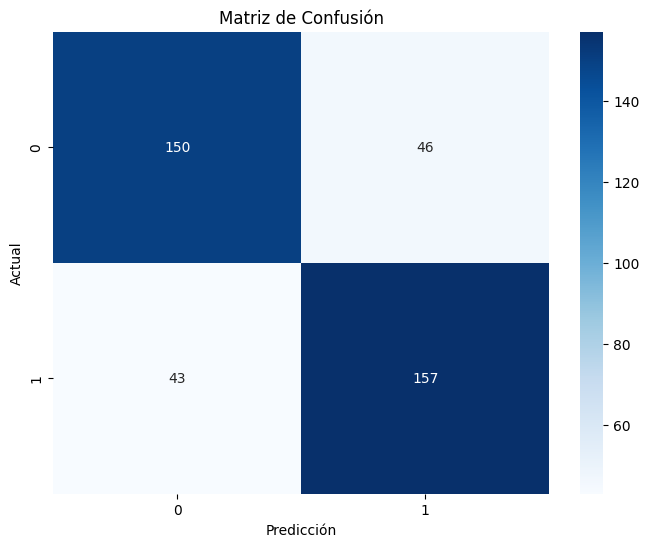

              precision    recall  f1-score   support

           0       0.78      0.77      0.77       196
           1       0.77      0.79      0.78       200

    accuracy                           0.78       396
   macro avg       0.78      0.78      0.78       396
weighted avg       0.78      0.78      0.78       396



In [64]:
from sklearn.metrics import confusion_matrix, classification_report

# Realizar predicciones en el conjunto de prueba
y_pred = pipeline_rfc.predict(X_test)

# Crear la matriz de confusión
cm = confusion_matrix(y_test, y_pred)

# Visualizar la matriz de confusión
plt.figure(figsize=(8, 6))
sns.heatmap(cm, annot=True, fmt='d', cmap='Blues', xticklabels=np.unique(y_test), yticklabels=np.unique(y_test))
plt.xlabel('Predicción')
plt.ylabel('Actual')
plt.title('Matriz de Confusión')
plt.show()

# Mostrar el reporte de clasificación
print(classification_report(y_test, y_pred))

Análisis de Resultados

**Matriz de Confusión:**
Clase 0 (mala calidad): 145 predicciones correctas y 51 incorrectas.
Clase 1 (buena calidad): 159 predicciones correctas y 41 incorrectas.

**Informe de Clasificación:**
Precisión: 0.78 para clase 0 y 0.76 para clase 1.

Recall: 0.74 para clase 0 y 0.80 para clase 1.

F1-Score: 0.76 para clase 0 y 0.78 para clase 1.

Exactitud (Accuracy): 0.77